#### Minimum Product Spanning Tree:

Given a connected and undirected graph, a spanning tree of that graph is a subgraph that is a tree and connects all the vertices together. A single graph can have many different spanning trees. A minimum product spanning tree for a weighted, connected, and undirected graph is a spanning tree with a weight product less than or equal to the weight product of every other spanning tree. The weight product of a spanning tree is the product of weights corresponding to each edge of the spanning tree. All weights of the given graph will be positive for simplicity.

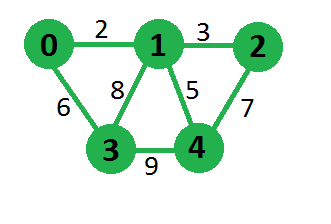

In [4]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/mps1.png")

    Minimum Product that we can obtain is 
    180 for above graph by choosing edges 
    0-1, 1-2, 0-3 and 1-4

This problem can be solved using standard minimum spanning tree algorithms like Kruskal (https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/)and prim’s algorithm, but we need to modify our graph to use these algorithms. Minimum spanning tree algorithms tries to minimize the total sum of weights, here we need to minimize the total product of weights. We can use the property of logarithms to overcome this problem. 

As we know, 

    log(w1* w2 * w3 * …. * wN) = 
        log(w1) + log(w2) + log(w3) ….. + log(wN)

We can replace each weight of the graph by its log value, then we apply any minimum spanning tree algorithm which will try to minimize the sum of log(wi) which in turn minimizes the weight product. 

For example graph, the steps are shown below diagram, 

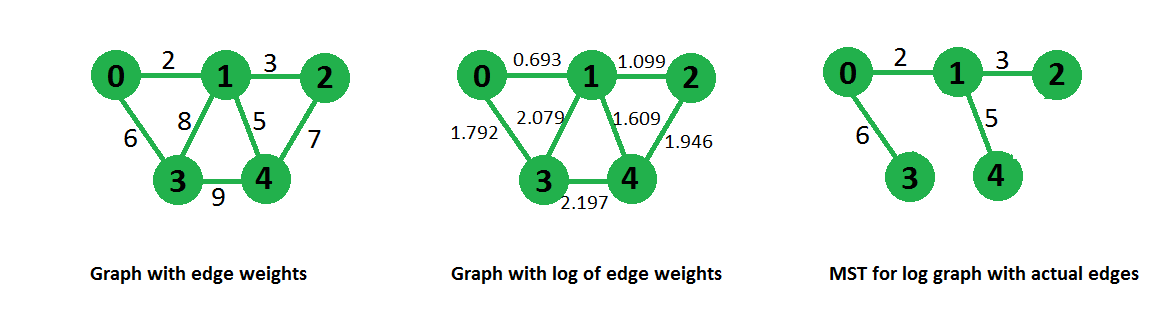

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Minimum Spanning Tree/img/mps2.png")

In the below code first, we have constructed the log graph from the given input graph, then that graph is given as input to prim’s MST algorithm, which will minimize the total sum of weights of the tree. Since weights of the modified graph are logarithms of the actual input graph, we actually minimize the product of weights of the spanning tree.

In [1]:
import math

V = 5
def minKey(key, mstSet):
	min = 10000000
	min_index = 0
	for v in range(V):
		if (mstSet[v] == False and
			key[v] < min): 
			min = key[v]
			min_index = v
	return min_index

def printMST(parent, n, graph):
	print("Edge Weight")
	minProduct = 1
	for i in range(1, V):
		print("{} - {} {} ".format(parent[i], i,graph[i][parent[i]]))
		minProduct *= graph[i][parent[i]] 
	print("Minimum Obtainable product is {}".format(
		minProduct)) 
 
def primMST(inputGraph, logGraph):
	parent = [0 for i in range(V)]
	key = [10000000 for i in range(V)]
	mstSet = [False for i in range(V)]
	key[0] = 0
	parent[0] = -1
	for count in range(0, V - 1):
		u = minKey(key, mstSet)
		mstSet[u] = True
		for v in range(V):
			if (logGraph[u][v] > 0 and
				mstSet[v] == False and
				logGraph[u][v] < key[v]):
				parent[v] = u
				key[v] = logGraph[u][v] 
	printMST(parent, V, inputGraph)

def minimumProductMST(graph):
	logGraph = [[0 for j in range(V)] for i in range(V)]

	for i in range(V):
		for j in range(V):
			if (graph[i][j] > 0):
				logGraph[i][j] = math.log(graph[i][j])
			else:
				logGraph[i][j] = 0 
	primMST(graph, logGraph)

if __name__=='__main__':
	
	''' Let us create the following graph 
		2 3 
	(0)--(1)--(2) 
		| / \ | 
	6| 8/ \5 |7 
		| /	 \ | 
	(3)-------(4) 
			9		 '''
	graph = [ [ 0, 2, 0, 6, 0 ], 
			[ 2, 0, 3, 8, 5 ], 
			[ 0, 3, 0, 0, 7 ], 
			[ 6, 8, 0, 0, 9 ], 
			[ 0, 5, 7, 9, 0 ], ]

	minimumProductMST(graph)

Edge Weight
0 - 1 2 
1 - 2 3 
0 - 3 6 
1 - 4 5 
Minimum Obtainable product is 180


The time complexity of this algorithm is O(V2) as there are two nested for loops which iterate over all the vertices. 

The space complexity of this algorithm is O(V2), as we are using a 2-D array of size V x V to store the input graph.